# Clasificador de tipos de plantas Iris empleando ML
- Iris-Setosa
- Iris-Versicolour
- Iris_Virginica

## Data mining  -> no tenemos que buscar porque se nos suministra

### Organizar la data / entender / procesar

In [1]:
#!pip install numpy matplotlib pandas scikit-learn
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

datos = load_iris() # Bunch

datos['a'] = 3

datos.a = 3 # claves -> atributos del objeto

#datos

In [2]:
print(datos.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

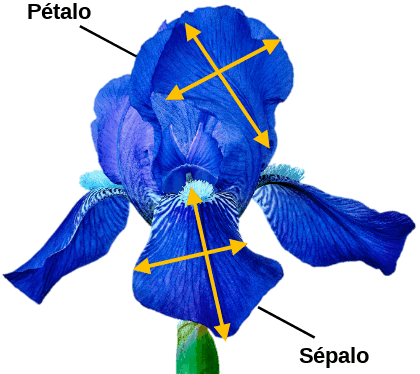

In [3]:
#datos["data"]
#datos.data
# feature_names -> nombres de las columnas de la data
x_df = pd.DataFrame(data=datos.data,columns=datos.feature_names)
print(x_df.head())
print(x_df.tail())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8


In [4]:
'''
target
- Iris-Setosa       -> 0
- Iris-Versicolour  -> 1
- Iris_Virginica    -> 2
'''

target = pd.DataFrame(data=datos.target, columns=["species"])
#target

In [5]:
iris = pd.concat([x_df,target],axis=1)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


In [7]:
iris.rename({
    "sepal length (cm)":"sepal_length",
    "sepal width (cm)" :"sepal_width",
    "petal length (cm)":"petal_length",
    "petal width (cm)" :"petal_width"    
},axis=1,inplace=True)

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
print(list(datos.target_names))

#iris["species"] = iris.species.map(lambda x:datos.target_names[x])
#la funcion map con lamba hace una especie de reemplazo al bucle for,
#aplica una accion a cada miembro  de la lista que estamos modificando
#en este caso busca la posicion target_names[0],target_names[1],target_names[2]
#y reemplaza por su respectivo valor que seria el nombre de la especie
'''
entonces el mapeo con lambda es los mismo que poner todo esto:
for elemento in iris["species"]:
    elemento=funcion(elemento)   
def funcion(elemento):
    if elemento==0:
        return "setosa"
    elif elemento==1:
        return "virginica"
    elif elemento==2:
        return "versicolor"

'''

iris

['setosa', 'versicolor', 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
# verificar si existen valores nulos NaN
iris.isna().sum()

# recomendacion las filas con valores NaN casi siempre se eliman 
#porque se consideran outliars (valores fuera de rango)
# en ocaciones puntuales, segun el entendimeinto de la data
#y el criterio del investigador (programador quiza) pongo un promedio

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Analisis de los datos

In [10]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### PRIMER ANALISIS

Entre mas grande sea la desviacion estandar (mas lejos esta el punto del modelo) osea que es menos parecido. desviacion estandar alta es malo!!!!!!!!!

si la desviacion estandar es pequeña hay mas correlacion recordemos que la correlacion es que tanto se parece la muestra al modelo

Analizamos desviacion estandar

petal_length tiene la mayor desviación estándar en comparación con otras características, petal_width parece tener un rango de valores más estrecho Sería mejor realizar una regularización después de comprobar el rendimiento del modelo debido a las diferencias de escala entre las características.

In [11]:
# correlacion: analiza la relacion(que tanto se parecen) las caracteristicas
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
species,0.782561,-0.426658,0.949035,0.956547,1.000000


El coeficiente de correlación de la petal_length y de petal_width es de 0,962865, que es extremadamente alto. Dado que las características altamente correlacionadas pueden inducir problemas (IA) de multicolinealidad, se recomienda seleccionar una de las dos variables a utilizar. o mejor, mirar como diferenciar haciendo un deep trainig con las otras caracteristicas

In [12]:
iris.groupby("species").size()

species
0    50
1    50
2    50
dtype: int64

In [13]:
iris.groupby("species").count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
0,50,50,50,50
1,50,50,50,50
2,50,50,50,50


Seleccione entre "size" y "count" dependiendo del propósito del análisis, ya que "size" cuenta el número de datos que incluyen valores NaN, mientras que "count" cuenta el número de datos sin valores NaN. En este caso, no hay diferencia entre "size" y "count" porque los datos de iris no tienen valores NaN.

## Graficas representativas

### Box plot -> diagrama de caja

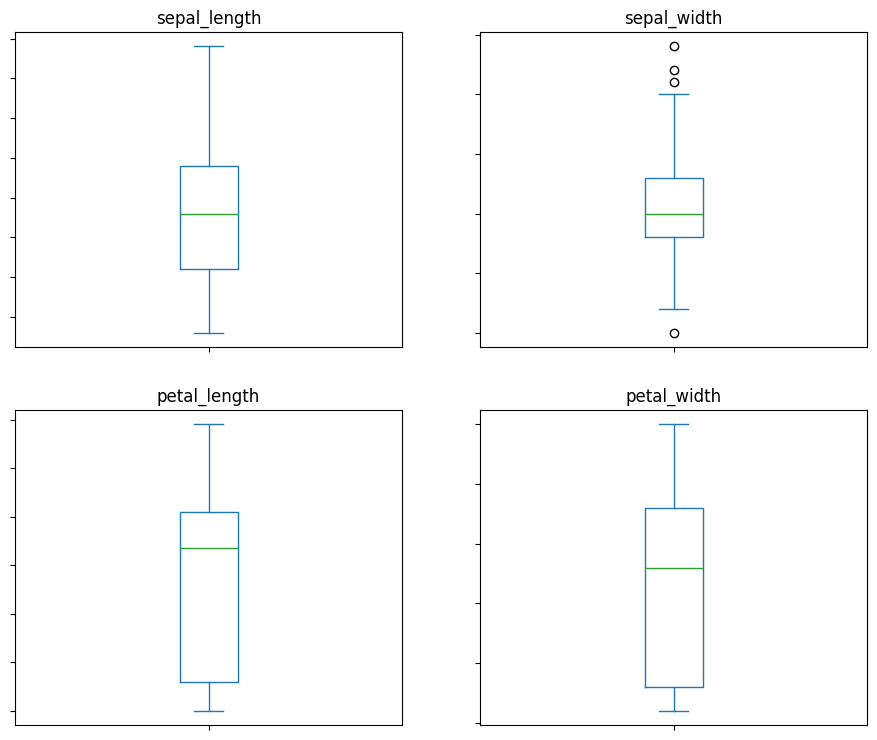

In [14]:
#https://byjus.com/maths/box-plot/

def boxplot_iris(feature_names,dataset):
    i=1
    plt.figure(figsize=(11,9))
    
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis("on")
        plt.tick_params(axis="both",
                        left=True,
                        top=False,
                        right=False,
                        bottom=True,
                        labelleft=False,
                        labeltop=False,
                        labelright=False,
                        labelbottom=False)
        dataset[col].plot(kind="box",subplots=True,sharex=False)
        plt.title(col)
        i+=1
    plt.show()
    
boxplot_iris(iris.columns[:-1],iris)

Dado que las longitudes de las cajas de sepal_length y sepal_width son cortas, se puede deducir que la tendencia de centralización de los datos es alta. El valor atípico(outliar) se detecta en sepal_width, y la longitud de caja larga de petal_length y petal_width indica que los datos están más ampliamente distribuidos.

### Histograma

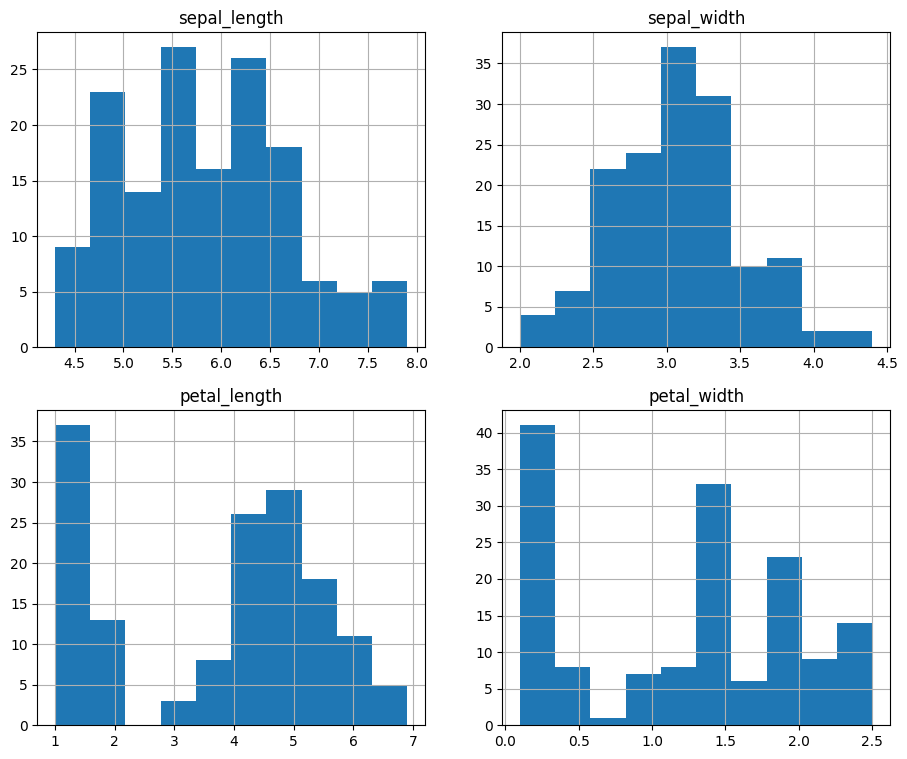

In [15]:
def hisplot_iris(feature_names,dataset):
    i=1
    plt.figure(figsize=(11,9))
    
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis("on")
        plt.tick_params(axis="both",
                        left=True,
                        top=False,
                        right=False,
                        bottom=True,
                        labelleft=True,
                        labeltop=False,
                        labelright=False,
                        labelbottom=True)
        dataset[col].hist()
        plt.title(col)
        i+=1
    plt.show()
    
hisplot_iris(iris.columns[:-1],iris)

La frecuencia del intervalo de clase de la mediana es alta para sepal_width, y se vuelve más baja a medida que se aleja del centro. En el diagrama de caja, la longitud de la caja de sepal_width es corta porque se agregaron muchos datos en la mediana. En el caso de la petal_width, la frecuencia del intervalo de clase de la mediana es alta, pero hay muchos datos en el intervalo de clase de la izquierda. En el gráfico de caja, la caja de petal_lengh es larga hasta el fondo porque hay muchos datos en valores inferiores.

In [16]:
#!pip install seaborn
import seaborn as sns

### Heatmap (mapa de calor)

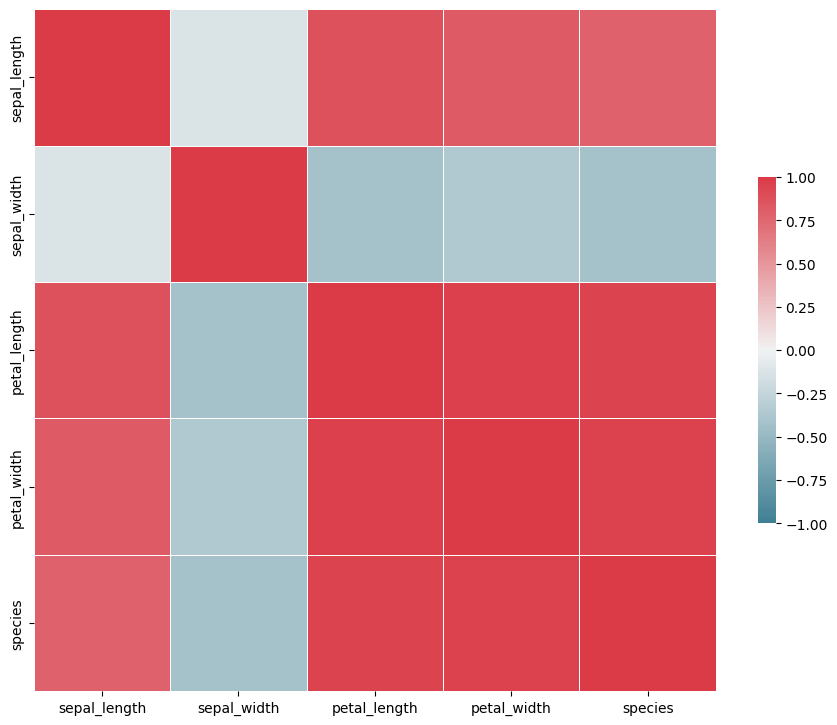

In [17]:
#https://seaborn.pydata.org/generated/seaborn.heatmap.html

corr=iris.corr()

cmap=sns.diverging_palette(220,10,as_cmap=True)
plt.figure(figsize=(11,9))
sns.heatmap(corr,
            cmap=cmap,
            vmax=1.0,
            vmin=-1.0,
            center=0,
            square=True,
            linewidths=0.5,
            cbar_kws={"shrink":0.5}     
           )
plt.show()

# Matriz de dispersion
puede mostrar la relacion entre multiples variables

<Figure size 1100x900 with 0 Axes>

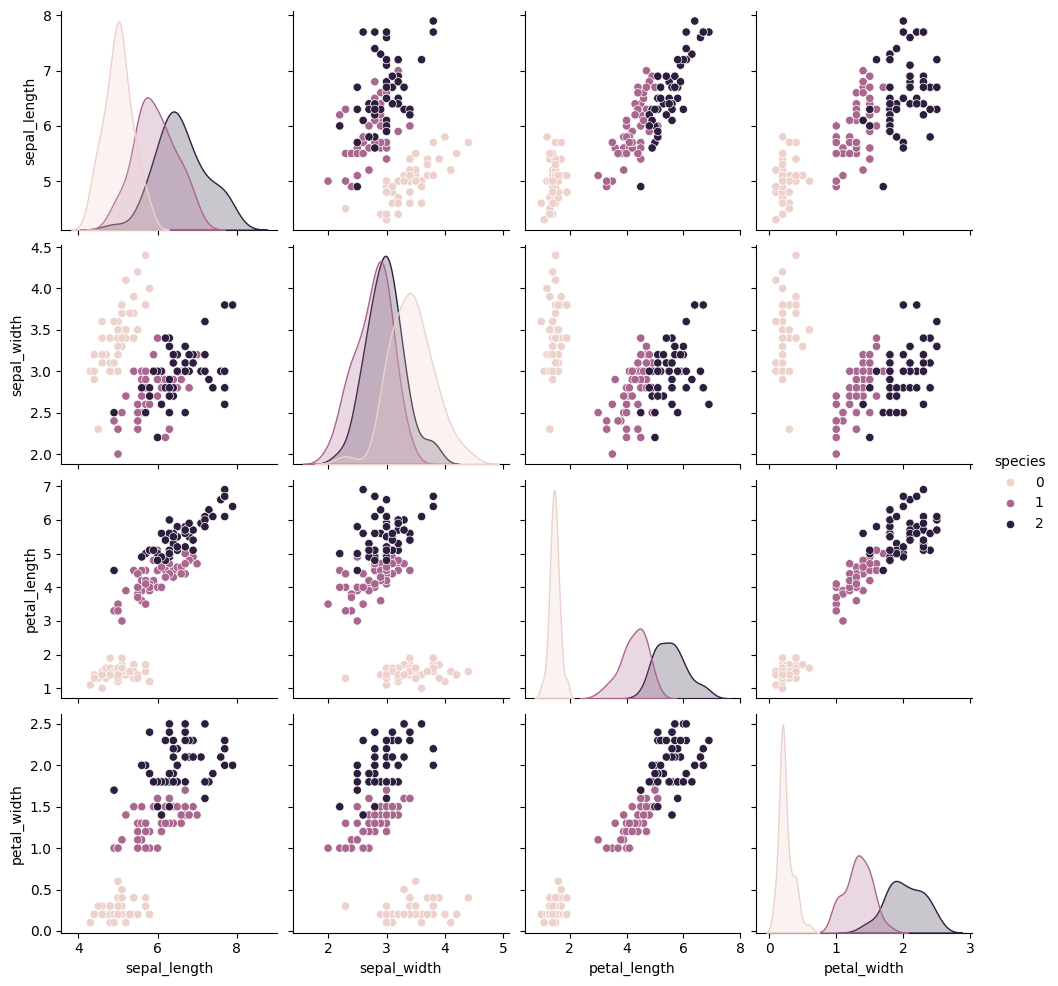

In [18]:
plt.figure(figsize=(11,9))
sns.pairplot(iris,hue="species")
plt.show()

Iris-setosa se agrega al desviarse claramente de otras clases. La clasificación es posible trazando una línea imaginaria, y setosa se clasificará como un modelo lineal.

En el caso de versicolor y virginica, parece difícil clasificarlas trazando una línea porque están mezcladas en el gráfico completo con las características sepal_width y sepal_length. Sin embargo, aunque parezca un poco vago, se pueden clasificar en otros gráficos.

- Explicacion en palabras mas sencillas:
    cuando se este creando el modelo el va a tomar una columnay le va a dar prioridad sobre otra
        y=f(x), si no es capaz de sacar un modelo o una funcion que diferencie 2 tipos de plantas, va a "descartar" esas 2 columnas como prioridades y pasa a analizar otro par de columnas como prioridad buscando encontrar un modelo(funcion) mas mas centrada para cada tipo de planta (una funcion ams concluyente)

#
___

# Creacion del modelo de ML 

Antes de iniciar el aprendizaje automático, hay que dividir el conjunto de datos en datos de entrenamiento y datos de prueba de rendimiento. El objetivo final del aprendizaje automático es crear un modelo generalizado para que pueda predecir con precisión nuevos datos. Si se evalúa el rendimiento con los datos que se utilizaron en el aprendizaje, la posibilidad de acertar es alta, ya que el modelo ya está familiarizado con la característica de los datos dada. Para que la evaluación sea fiable, hay que separar el conjunto de datos de prueba de rendimiento del conjunto de datos de entrenamiento. Por tratarse de la separación de los datos, se denomina método hold out.

Divida el conjunto de datos de entrenamiento y el conjunto de datos de prueba de rendimiento con la función train_test_split de sklearn. Clasifique los datos de entrenamiento como "train" y los datos de prueba de rendimiento como "test". X es la característica del conjunto de datos, e y es el objetivo. Para el análisis de datos estructurados, indique DataFrame con mayúsculas y Series con minúsculas. La opción test_size=0.33 separa el 33% de los datos totales como conjunto de prueba. random_state=42 es una opción utilizada para inducir resultados reproducibles para el problema de la práctica. Si no se designa random_state, el conjunto de datos para la conversión será diferente cada vez.

NOTA: 3 pasos :

1. instanciar. -> dividir los datos en x_train,y_train,x_test,y_test

    1.1 :definir el modelo
2. fit ->ajustar
3. predecir
para instanciar, utilice el hiperparametro del modelo como argumento.

El hiperparametro es una opcion que REQUIERE CONFIGURACION HUMANA (AI SUPERVISADA!!!!!!!!) afecta MUCHO al rendimiento del modelo

In [19]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

datos = load_iris()

In [20]:
from sklearn.model_selection import train_test_split

x,y = datos.data, datos.target

x_train,x_test,y_train,y_test = train_test_split(
#        x           y
    datos.data, datos.target, test_size=0.33, random_state=42)
print("datos de entrenamiento:", len(x_train))
print("datos de testeo:", len(x_test))

datos de entrenamiento: 100
datos de testeo: 50


In [21]:
# definir el modelo
from sklearn.tree import DecisionTreeClassifier  #importo el modelo 
#ver en la webpage : https://scikit-learn.org/stable/modules/tree.html#classification

### 1) instaciar modelo
model = DecisionTreeClassifier(
    criterion="gini",#Entropia
    splitter="best",
    max_depth=None,#???
    min_samples_split=2,#???
    min_samples_leaf=1,#???
    min_weight_fraction_leaf=0.0,
    max_features=None,#???
    random_state=42,
    max_leaf_nodes=None,#???
    min_impurity_decrease=0.0,#???
    #min_impurity_split=None,
    class_weight=None
)

* Impureza de Gini o Entropía:

    La diferencia entre la impureza de Gini y la entropía es imprecisa en la vida real. Ambas crean un árbol similar. El cálculo de la impureza de Gini es más rápido, por lo que se recomienda por defecto. Sin embargo, al crear un árbol diferente, mientras que la impureza de Gini tiende a aislar la clase más frecuente a un lado, la entropía da lugar a un árbol más equilibrado.

* Regularización: Limita el grado de libertad del árbol de decisión.

* Disminuir la profundidad máxima restringiría el modelo y reduciría el riesgo de sobreajuste.

* min_samples_split: Cantidad mínima de muestras requeridas por el nodo para la división.

* min_weight_fraction_leaf: Idéntico al min_samples_leaf, pero es la fracción con peso en toda la muestra.

* max_leaf_nodes: Número máximo de nodos hoja.

* max_features: Número máximo de la característica que se utilizará para la división por cada nodo.

    Aumentar el parámetro que empieza por min_ o bajar el que empieza por max_ aumentaría la restricción del modelo.

In [22]:
### 2) ajustar el modelo -> fit
model.fit(x_train, y_train)
# le mando los datos para que entrene y aprenda
#fit ajusta los datos para crear un modelo(regresion) que pueda predecir los datos

DecisionTreeClassifier(random_state=42)

In [23]:
help(model)

Help on DecisionTreeClassifier in module sklearn.tree._classes object:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy", "log_loss"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "log_loss" and "entropy" both for the
 |      Shannon information gain, see :ref:`tree_mathematical_formulation`.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      stra

In [24]:
'''
Evalúa el rendimiento utilizando el conjunto de datos de prueba de rendimiento.
En el Scikit-learn, la puntuación se refiere a la precisión.
Dado que el conjunto de datos del iris es un conjunto de datos bien estructurado 
para la práctica, generalmente muestra un alto rendimiento en cualquier modelo
'''
# evaluo la eficiencia del modelo
print(f"la precisión del modelo es:", model.score(x_test, y_test))

la precisión del modelo es: 0.98


En este proyecto/ejemplo no se realiza predict porque no es necesario, solo nos interesa conocer el rendimiento del modelo, cuando se suministre data diferente para dar utilidad a la IA se hace el llamado a predict.

y_pred=model.predict(x_test)

## Estrategias de generalizacion del modelo

Dado que el aprendizaje automático se basa en el rendimiento de los modelos en función de los datos, se requiere una cantidad suficiente de datos para obtener un buen rendimiento. Una cantidad insuficiente de datos puede dar lugar a un sobreajuste, lo que significa que el modelo muestra una menor capacidad de predicción con respecto a los datos no vistos porque se ajusta sólo a las características de los datos de entrenamiento.

La siguiente es la estrategia de generalización para que el modelo proporcione un alto rendimiento en relación con los datos no vistos.

#### Conjunto de validación

El conjunto de datos de prueba de rendimiento dividido con Train_test_split es para la evaluación final del rendimiento del modelo. Debido a que es necesario comprobar el rendimiento del modelo durante el aprendizaje del mismo, se retiran algunos de los datos del conjunto de datos de entrenamiento y se utilizan como conjunto de validación.

Se puede encontrar una posibilidad de sobreajuste durante el aprendizaje utilizando el conjunto de validación, y también se utiliza para encontrar los hiperparámetros.

#### Recorderis
para instanciar, utilice el hiperparametro del modelo como argumento.<br>
los hiperparametros Requieren Configuración (AI Supervisada!)<br>
afecta al rendimiento del modelo

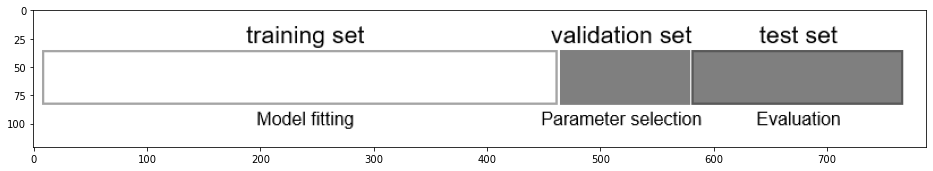

## Validacion cruzada

Esta es una estrategia para hacer muchos conjuntos de validación para que cada dato pueda ser incluido en el aprendizaje una vez.

Dividir el conjunto de datos en un número aleatorio n=k (k-pliegues).

Utilice el primer pliegue como conjunto de validación y utilice los otros k-1 pliegues como conjunto de entrenamiento, y mida el rendimiento.

Utilice el segundo pliegue como conjunto de prueba y los otros pliegues como conjunto de entrenamiento para el aprendizaje, y luego mida el rendimiento.

Repita el mismo proceso con todos los demás pliegues para poder incluir todos los datos en el entrenamiento.

Obtenga k resultados de evaluación del rendimiento y, a continuación, haga una media para predecir el rendimiento del modelo.

La siguiente figura es un ejemplo cuando k=5.

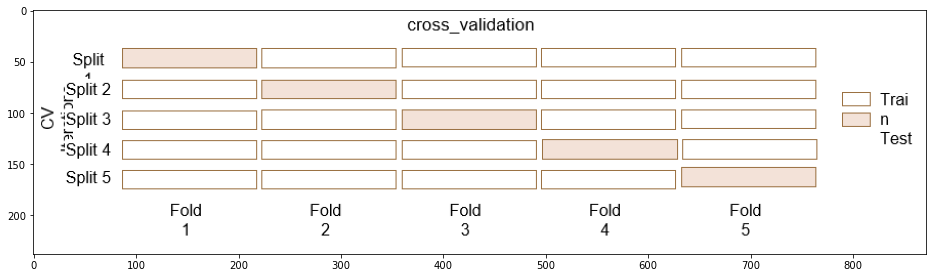

In [25]:
# la validacion cruzada puede realizarse facilmente utilizando la funcion
# cross_val_score de sklearn
import numpy as np
from sklearn.model_selection import cross_val_score, KFold # fold -> pliegue

# cross validation
cv = KFold(n_splits=10,shuffle=True,random_state=42)

results = cross_val_score(model,x,y,cv=cv)

for i,j in enumerate(results): #enumerate asigna pares al contador
    print(f"Score del fold(pliegue) numero {i} : {j}")
    
    
print(f"la eficiencia promedio es: {np.mean(results)}")

Score del fold(pliegue) numero 0 : 1.0
Score del fold(pliegue) numero 1 : 1.0
Score del fold(pliegue) numero 2 : 1.0
Score del fold(pliegue) numero 3 : 0.9333333333333333
Score del fold(pliegue) numero 4 : 0.9333333333333333
Score del fold(pliegue) numero 5 : 0.8666666666666667
Score del fold(pliegue) numero 6 : 0.8666666666666667
Score del fold(pliegue) numero 7 : 1.0
Score del fold(pliegue) numero 8 : 0.8666666666666667
Score del fold(pliegue) numero 9 : 0.9333333333333333
la eficiencia promedio es: 0.9400000000000001


## Metodo estratificado

La división aleatoria del conjunto de entrenamiento y del conjunto de validación daría lugar a una clase objetivo inconstante cuando se retiene. Si es así, la distribución de los datos difiere en el conjunto de entrenamiento y en el conjunto de validación, lo que afecta al aprendizaje.

Para el aprendizaje automático, existe una premisa en la que la distribución de los datos de entrenamiento y la distribución de los datos de la vida real son iguales. Si no se cumple esta premisa, el rendimiento del modelo de aprendizaje disminuye. Por lo tanto, para evitar este problema, se utiliza el método estratificado para distribuir uniformemente la proporción de clases objetivo.

La validación cruzada es posible enviando la instancia de StratifiedKFold a la opción cv de cross_val_score.

La siguiente figura proporciona una comprensión intuitiva de cómo el método estratificado clasifica los datos.

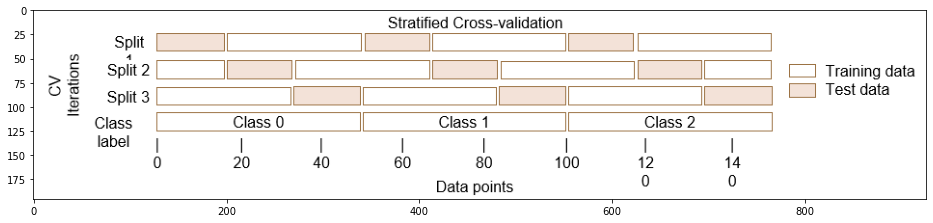

In [26]:
# instanciar -> sacar nuestras 4 variables para poder crear los modelos

from statistics import mean, stdev
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model

In [27]:
# A diferencia de validacion cruzada, no entro los datos x_train y x_test sino que
# agrego toda la data de nuevo para rehacer el split y tener todos los datos estratificados
#no solo el conjunto de validacion

# instanciar -> sacar nuestras 4 variables para poder crear los modelos
# como se sacan? -> haciendo el split con StratifiedKFold

# x: data / primeras 4 columnas
x = datos.data # lo llame desde el bunch , pero tambien lo podia llamar desde el df con iris.iloc[:,:-1]

# y: target / ultima col del df
y = datos.target

#_____________________ Hacemos el split  utilizando estratificacion __________________-

#escala los datos de manera que queden normalizados entre 1 y 0
scaler = MinMaxScaler() #
# fit ajusta los datos para crear un modelo,
# en este caso crea un modelo de los datos escalados
x_scaled = scaler.fit_transform(x)

#crear el objeto StratifiedKFold
skf = StratifiedKFold(
    n_splits=10,
    shuffle=True,
    random_state=42
)


# aqui como ejemplo hago el split de los renglones originales
#                  ojo!! aqui mande al split x y y ORIGINAL
n=0
for train_index,test_index in skf.split(x,y):
    n+=1
    print(f"__________________KFold # :{n}__________________________")
    print(f"Test: {test_index} \n________________________________")
    print(f"la cantidad de datos para testeo es: {len(test_index)}\n")
    #los numeros representan las filas especificas de la data que tomó para hacer la division 

# difinir el modelo que en este metodo será
# crear el objeto clasificador

lr=model # el modelo que ya traia

__________________KFold # :1__________________________
Test: [ 11  14  25  33  35  52  59  65  87  97 100 107 124 130 144] 
________________________________
la cantidad de datos para testeo es: 15

__________________KFold # :2__________________________
Test: [ 13  15  20  29  45  78  85  92  94  99 102 112 138 139 148] 
________________________________
la cantidad de datos para testeo es: 15

__________________KFold # :3__________________________
Test: [  0  10  31  40  47  58  68  74  80  90 111 114 120 121 136] 
________________________________
la cantidad de datos para testeo es: 15

__________________KFold # :4__________________________
Test: [  4   9  19  21  42  60  75  82  89  96 106 108 109 110 149] 
________________________________
la cantidad de datos para testeo es: 15

__________________KFold # :5__________________________
Test: [ 22  34  38  41  44  56  64  66  70  71 116 118 127 132 133] 
________________________________
la cantidad de datos para testeo es: 15

__________

In [28]:
lst_accu_stratified = []

for train_index,test_index in skf.split(x,y):
    #lo mismo que hemos hecho siempre en ML
    # separo la data de entrenemiento y de testeo, en esta ocacion , en vez de 
    #hacer con train_test_split, hicimos el metodo estratificado con su escaldo
    # en la linea 10 y 11 llamamos esos kfold estratificados para hacer el fit
   
    # instanciar # saco las 4 variables de siempre
    x_train_fold,x_test_fold = x_scaled[train_index],x_scaled[test_index]
    y_train_fold,y_test_fold = y[train_index],y[test_index]
    
    #hacer el fit
    #fit manda los datos de entrenamiento para que el modelo que ya existia, reaprenda con los
    #nuevos datos especificos del fold especifico que estor trabajando en el for
    lr.fit(x_train_fold,y_train_fold) # lr es el mismo modelo que traiamos, 
    #ahora aplicado a la data procesada con el metodo estratificado
    
    #hago la prediccion o mido precisión
    lst_accu_stratified.append(lr.score(x_test_fold,y_test_fold))

In [29]:
print("__________________________Eficiencia_______________________________\n")

print("lista de eficiencia:\n")
for n,eff in enumerate(lst_accu_stratified):
    print(f"Eficiencia del modelo {n}:",eff)
    
print("____________RESUMEN_____________")
print(f"Eficiencia maxima:{max(lst_accu_stratified)*100}%")
print(f"Eficiencia minima:{min(lst_accu_stratified)*100}%")
print(f"Eficiencia promedio: {mean(lst_accu_stratified)*100}%")
print(f"Desviación estandar :{stdev(lst_accu_stratified)}")

__________________________Eficiencia_______________________________

lista de eficiencia:

Eficiencia del modelo 0: 1.0
Eficiencia del modelo 1: 0.9333333333333333
Eficiencia del modelo 2: 1.0
Eficiencia del modelo 3: 0.9333333333333333
Eficiencia del modelo 4: 0.8666666666666667
Eficiencia del modelo 5: 0.8666666666666667
Eficiencia del modelo 6: 1.0
Eficiencia del modelo 7: 0.9333333333333333
Eficiencia del modelo 8: 0.9333333333333333
Eficiencia del modelo 9: 0.8666666666666667
____________RESUMEN_____________
Eficiencia maxima:100.0%
Eficiencia minima:86.66666666666667%
Eficiencia promedio: 93.33333333333333%
Desviación estandar :0.05443310539518172


Si la cantidad de datos es suficiente, se mantiene una distribución de datos idéntica incluso cuando el conjunto de entrenamiento y el conjunto de validación se dividen aleatoriamente. El método de validación cruzada es necesario cuando los datos son insuficientes. Para determinar si hay suficiente cantidad de datos, dibuje una curva de aprendizaje. La curva de aprendizaje muestra cómo cambia el rendimiento al aumentar ligeramente la cantidad de datos de entrenamiento, estableciendo el eje x como número de datos de entrenamiento y el eje y como puntuación de rendimiento. La puntuación de la prueba se calcula mediante una validación cruzada interna. La curva de aprendizaje puede ser dibujada usando la librería scikitplot que soporta scikit-learn.

Instalaremos entonces la biblioteca por separado de scikit-learn para utilizarla. La biblioteca scikitplot no se proporciona en anaconda por defecto, por lo que es necesario instalarla

# Curva de aprendizaje
en la curva, observo la validacion cruzada interna del metodo estratificado, es decir, ya no tengo que hacerlo en código, sino que puedo llamar a la grafica e interpretarla

In [30]:
!pip uninstall -y scipy==1.13.0

Found existing installation: scipy 1.11.4
Uninstalling scipy-1.11.4:
  Successfully uninstalled scipy-1.11.4


In [31]:
#scipy==1.13.0 última version
#!pip install scikit-plot scipy==1.11.4
import scipy
scipy.__version__

'1.11.4'

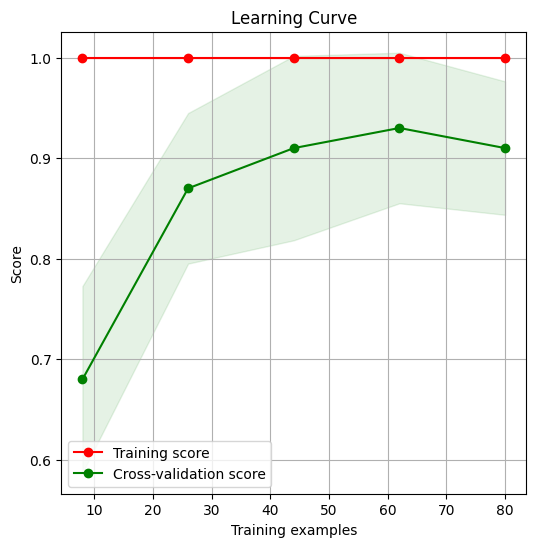

In [32]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(model,x_train,y_train,figsize=(6,6))
plt.show()

La línea verde es el resultado de la validación cruzada. Cuando la línea verde sube hacia la derecha pero luego empieza a bajar, es cuando se produce el sobreajuste. La línea roja son los datos utilizados para el entrenamiento que se validan. La línea roja puede caer momentáneamente si hay demasiados datos. Este fenómeno es sólo temporal y el gráfico converge a largo plazo.


# Empecemos a optimizar

#Hiperparámetro

recordando: Los hiperparámetros son parámetros ajustables que permiten controlar el proceso de entrenamiento de un modelo.

En el aprendizaje automático, la máquina aprende de los datos y encuentra los parámetros por sí misma. Los hiperparámetros se refieren a los parámetros que necesitan ser designados directamente por un humano (SUPERVISED) ya que no pueden ser encontrados por la máquina. En el scikit-learn, es posible establecer hiperparámetros para instanciar un algoritmo.

# Búsqueda de hiperparámetros mediante GridSearchCV
En general, los hiperparámetros se encuentran con la experiencia de un analista. Scikit-learn proporciona la función GridSearchCV que encuentra los hiperparámetros, esta es una función que enumera todo el número de casos con respecto a la combinación de hiperparámetros en una cuadrícula y aprende y realiza la medición del rendimiento a cada combinación.

Puede parecer que se trabaja sin ningún plan, pero el trabajo lo realiza automáticamente la máquina, ya que el rango de hiperparámetros es designado por el analista. Aunque lleva algo de tiempo, facilita la búsqueda de hiperparámetros.

De forma similar a los algoritmos, instancie también el GridSearchCV. Al instanciar, envíe el modelo de algoritmo instanciado como argumento a la opción de estimador. Para param_grid, envíe el diccionario que contiene los hiperparámetros para las pruebas como argumento.

In [33]:
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV

parameters = {
    "max_depth":[4,6,8,10,12],
    "criterion":["gini","entropy"],
    "splitter":["best","random"],
    "min_weight_fraction_leaf":[0.0,0.1,0.2,0.3],
    "random_state":[7,23,42,78,142],
    "min_impurity_decrease":[0.0,0.05,0.1,0.2],
}

stimador = DecisionTreeClassifier()

model2 = GridSearchCV(
    estimator=stimador,
    param_grid=parameters,
    cv=KFold(10),
    verbose=1,
    n_jobs=-1,
    refit=True
)
'''
ojo!! el modelo y modelo2  tienen diferentes hiperparametros y a ambos los entreno con x_train
x_train era esa primera lista de entrenamiento antes de aplicar metodo estratificado 

PERO!! en GridSearchCV tengo el parametro  cv=KFold(10), que garantiza  que ademas de 
cambiar los hiperparametros tambien aplico estratificacion al modelo 2
'''

model2.fit(x_train,y_train) 

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                         'random_state': [7, 23, 42, 78, 142],
                         'splitter': ['best', 'random']},
             verbose=1)

In [34]:
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "score_samples", "predict", "predict_proba",
 |  "decision_function", "transform" and "inverse_transform" if they are
 |  implemented in the estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either est

El número total posible de casos que se pueden realizar con los parámetros del problema de práctica es de 1600. Como k=10 en la validación cruzada K-fold, se realizaron 10 validaciones cruzadas para cada caso, de modo que se hizo un total de 16.000 entrenamientos.

La siguiente tabla muestra las combinaciones de hiperparámetros en el problema de práctica.

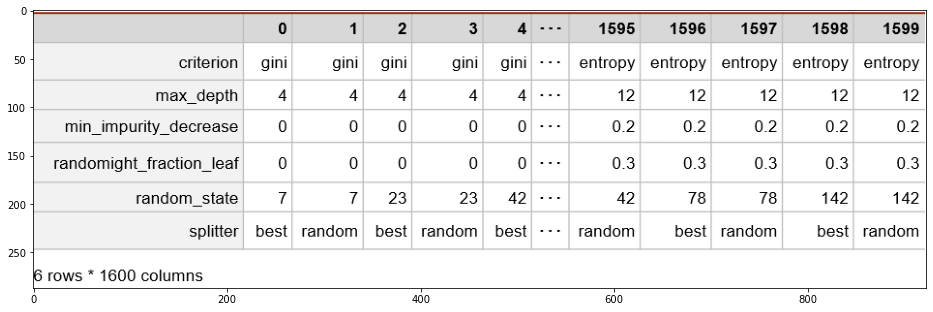

Los parámetros óptimos y el rendimiento optimizado encontrados con GridSearCV se registran en los atributos best_params_ y best_score_. Si la opción refit se establece como True, entrena el modelo con los hiperparámetros óptimos y los registra en el atributo best_estimator_

In [35]:
print(f"La mejor combinacion de parametros es:\n {model2.best_params_}")

La mejor combinacion de parametros es:
 {'criterion': 'gini', 'max_depth': 4, 'min_impurity_decrease': 0.0, 'min_weight_fraction_leaf': 0.0, 'random_state': 23, 'splitter': 'random'}


In [36]:
#fue la mejor de todas con un score de
print("la eficiencia de la IA con el modelo AUTOMATIZADO es: model2 = ",model2.best_score_)

la eficiencia de la IA con el modelo AUTOMATIZADO es: model2 =  0.9700000000000001


In [37]:
model2.best_estimator_

DecisionTreeClassifier(max_depth=4, random_state=23, splitter='random')

la eficiencia en el modelo 1 dio 98% la eficiencia en el modelo 2 dio 97%

creemos que es peor PERO!!!, modelo2 se testeo con x_test_fold!!! lo testeamos con el metodo estratificado, en cambio el modelo 1 lo habiamos probado con x_test, sacado con train_test_split


La evaluacion del score es una manera en la cual yo puedo intuir la eficiencia de un modelo, sin embargo existen otros factores que no son considerados al momento de evaluar el modelo con el metodo score

In [38]:
from sklearn.metrics import accuracy_score
pred2 = model2.predict(x_test)
pred2

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0, 1, 1, 2, 1, 2])

In [39]:
accuracy_score(y_test,pred2)

0.98

### Limitaciones de la precisión
Hasta ahora, la precisión era el único criterio para validar el modelo, pero existe una limitación. Se necesita algo más que la precisión para evaluar el modelo correctamente. Si hay un modelo que sólo predice "setosa" incluso cuando se introducen varios tipos de datos, el rendimiento del modelo sería dudoso. Sin embargo, supongamos que hay 48 setosas, 1 versicolor y 1 virginica en el conjunto de prueba. Al hacer una evaluación utilizando este conjunto de prueba, un problema es que tendría un 96% de precisión. Sin embargo, no es porque el rendimiento del modelo sea grande. Sería necesario comprobar también otros criterios de evaluación para evaluar con precisión el rendimiento del modelo.

# matriz de confusion
Utilice la matriz de confusión para analizar los resultados predichos correctos y erróneos. La matriz de confusión puede validar el rendimiento de diferentes maneras para ver lo bien que acertaron los objetivos predichos y los reales.

Las puntuaciones de evaluación incluyen la precisión, el recuerdo, la puntuación f1 y otras, se pueden realizar en función de los cuatro conceptos (TP, FP, TN, FN). indicados en la siguiente grafica

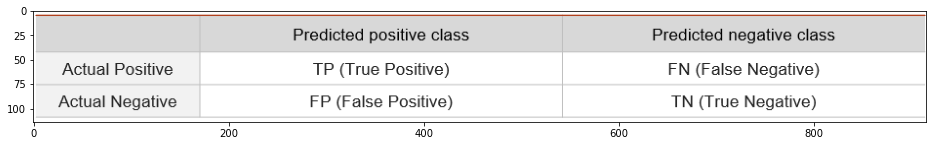

### Clasificación multietiqueta
Dado que los datos del iris son un problema de clasificación multietiqueta, no pueden expresarse en cuatro conceptos diferentes solamente, como se ha indicado anteriormente. Por lo tanto, cree tres índices para cada setosa, versicolor y virginica considerando cada uno de ellos como un problema de clasificación binaria. Tomemos como ejemplo la setosa.

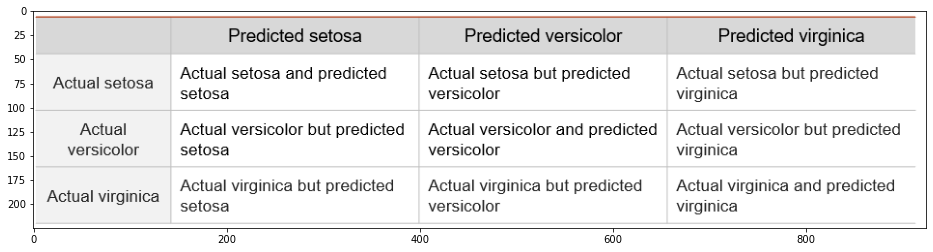

In [40]:
# Con scikit-learn, es posible calcular fácilmente la matriz de confusión utilizando 
#la función confusion_matrix.
# Envía los argumentos a la clase real y luego a la clase predicha.

from sklearn.metrics import confusion_matrix
#pred1=model.predict(x_test)
pred2=model2.predict(x_test) # ya lo teniamos

#print(confusion_matrix(y_test,pred1))
print(confusion_matrix(y_test,pred2))

[[19  0  0]
 [ 0 15  0]
 [ 0  1 15]]


In [41]:
#print(f"la eficiencia del modelo es: {model.score(x_test,y_test)}")

In [42]:
'''
print("grafica de matriz de confusion para el modelo 1")

skplt.metrics.plot_confusion_matrix(y_test,pred1,figsize=(8,6))
plt.show()

#usamos scikit-plot para visualizar la matriz de confusión en un mapa de calor.
# El scikit-learn no tenía etiquetas para el eje x y el eje y, pero scikit-plot tiene etiquetas para 
# el eje para facilitar la interpretación de los resultados.

'''
print()

grafica de matriz de confusion para el modelo 2


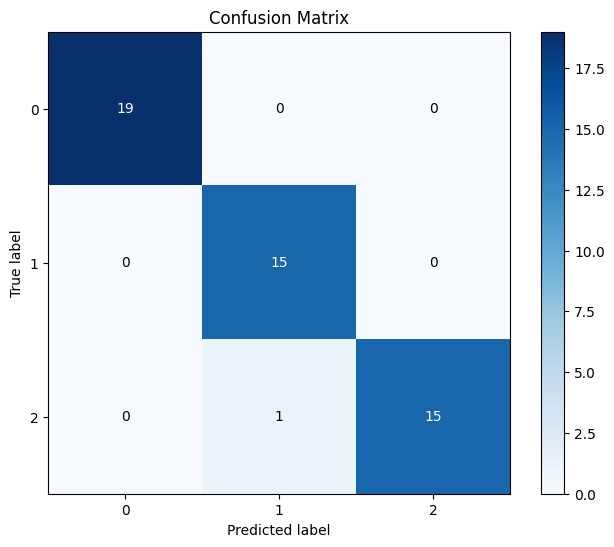

In [43]:
print("grafica de matriz de confusion para el modelo 2")

skplt.metrics.plot_confusion_matrix(y_test,pred2,figsize=(8,6))
plt.show()

# Precisión

In [44]:
'''
#La precisión es la proporción de la clase predicha correctamente

#precision= TP/(TP+FP)

from sklearn.metrics import precision_score
#evaluo para el modelo1
precisions=precision_score(y_test,pred1,average=None) 
print("Para el modelo numero 1")
for target,score in zip(datos.target_names,precisions):
    print("{} presicion : {}".format(target,score))
    
'''
print()

In [45]:
#La precisión es la proporción de la clase predicha correctamente

## precision = TP/(TP+FP)

from sklearn.metrics import precision_score
#evaluo par ale modelo2
precisions=precision_score(y_test,pred2,average=None) 
print("Para el modelo numero 2")
for target,score in zip(datos.target_names,precisions):
    print("{} presicion : {}".format(target,score))

Para el modelo numero 2
setosa presicion : 1.0
versicolor presicion : 0.9375
virginica presicion : 1.0


## Recall
Tambien llamado sensibilidad o recuperacion es la proporcion de predicciones correctas entre la clase objetivo real

In [46]:
## recall = TP/(TP+FN)

from sklearn.metrics import recall_score

recalls=recall_score(y_test,pred2,average=None)

for target,score in zip(datos.target_names,recalls):
    print("{} recall (recuperacion) :{}".format(target,score))


setosa recall (recuperacion) :1.0
versicolor recall (recuperacion) :1.0
virginica recall (recuperacion) :0.9375


* En recall detecta cual era la realidad y en cual me equivoque
* la presicion muestra lo que la maquina cree que es, y si se equivoca baja la eficiencia

### f-score
La precisión y la recuperación tienen una relación de compromiso. La puntuación f es la media armónica ponderada de la precisión y la recuperación.

analisis : Si la puntuación f es inferior o igual a 1, se da más peso a la precisión, y si es superior a 1, se da más peso a la recuperación. La puntuación f se utiliza para comprender con precisión el rendimiento del modelo cuando la clase de datos está desequilibrada.

In [47]:
from sklearn.metrics import f1_score


f1s = f1_score(y_test,pred2,average=None)

for target,score in zip(datos.target_names,f1s):
    print(target, "score avanzado del modelo:", score)

setosa score avanzado del modelo: 1.0
versicolor score avanzado del modelo: 0.967741935483871
virginica score avanzado del modelo: 0.967741935483871


### Reporte de clasificacion
entrega un resumen de los metodos de evaluacion de eficiencia que acabamos de ver

In [48]:
from sklearn.metrics import classification_report

print( classification_report(y_test,pred2) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



El soporte es el número de clases objetivo reales. La media de las puntuaciones de evaluación de cada clase se utiliza como puntuación de rendimiento global del modelo. La media macro se refiere a una media simple, mientras que la media ponderada es una media ponderada del número de muestras de cada clase.

## ROC curve
La curva ROC (Receiver Operating Characteristic) visualiza los cambios en la tasa de recuperación y de falsos positivos en función de los cambios en el valor de determinación de la clase. A medida que el valor de determinación de la clase es menor, aumenta el número de positivos de predicción.

Por ejemplo, si la probabilidad de setosa es de 0,6, cuando el valor de referencia es de 0,55, predice positivo, pero si el valor de referencia aumenta a 0,65, la predicción cambia a negativo.

In [49]:
x_test # lo pongo para que veamos el index y miremos manual cual era la planta

array([[6.1, 2.8, 4.7, 1.2],
       [5.7, 3.8, 1.7, 0.3],
       [7.7, 2.6, 6.9, 2.3],
       [6. , 2.9, 4.5, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [5.4, 3.4, 1.5, 0.4],
       [5.6, 2.9, 3.6, 1.3],
       [6.9, 3.1, 5.1, 2.3],
       [6.2, 2.2, 4.5, 1.5],
       [5.8, 2.7, 3.9, 1.2],
       [6.5, 3.2, 5.1, 2. ],
       [4.8, 3. , 1.4, 0.1],
       [5.5, 3.5, 1.3, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.1, 3.8, 1.5, 0.3],
       [6.3, 3.3, 4.7, 1.6],
       [6.5, 3. , 5.8, 2.2],
       [5.6, 2.5, 3.9, 1.1],
       [5.7, 2.8, 4.5, 1.3],
       [6.4, 2.8, 5.6, 2.2],
       [4.7, 3.2, 1.6, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 2.8, 5.6, 2.1],
       [7.9, 3.8, 6.4, 2. ],
       [6.7, 3. , 5.2, 2.3],
       [6.7, 2.5, 5.8, 1.8],
       [6.8, 3.2, 5.9, 2.3],
       [4.8, 3. , 1.4, 0.3],
       [4.8, 3.1, 1.6, 0.2],
       [4.6, 3.6, 1. , 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.7, 3.1, 4.4, 1.4],
       [4.8, 3.4, 1.6, 0.2],
       [4.4, 3

In [50]:
# halla la probabilidad de que sea cada tipo de planta
# col1= setosa , col2= versicolor col3= virginica
pred_proba = model2.predict_proba(x_test)
pred_proba

array([[0.        , 0.93939394, 0.06060606],
       [1.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.93939394, 0.06060606],
       [1.        , 0.        , 0.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.        , 1.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.0625    , 0.9375    ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.0625    , 0.9375    ],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.93939394, 0.06060606],
       [0.        , 0.0625    , 0.9375    ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.0625    , 0.9375    ],
       [1.

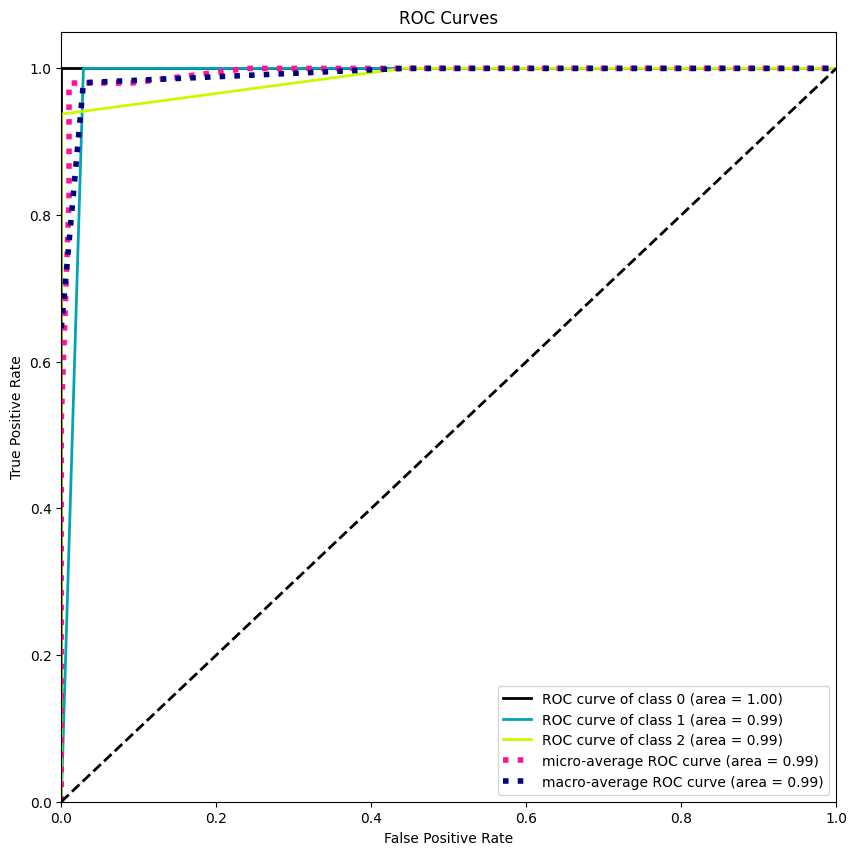

In [51]:
skplt.metrics.plot_roc(y_test,pred_proba,figsize=(10,10))
plt.show()

El modelo tiene un mejor rendimiento a medida que la curva ROC se desvía hacia arriba de la línea diagonal. Para expresar el gráfico con números, calcule el área inferior de la curva ROC, que estará entre 0 y 1. Esto se denomina AUC (Area Under ROC Curve), y cuando el AUC es 1, el rendimiento del modelo es máximo. Si el AUC es superior a 0,5, tendrá un mejor rendimiento que un modelo de clasificación creado al azar. Por otro lado, si el AUC es inferior a 0,5, es probable que el modelo tenga un problema.

El AUC se convierte en 0 cuando la predicción de verdadero y falso es opuesta.

Si el rendimiento del modelo no cumple con el objetivo del resultado de la evaluación del modelo, vuelva al paso anterior para mantener el modelo. Reorganice los hiperparámetros o cambie el algoritmo. O bien, vuelva al paso de preprocesamiento para escalar las características o reducir el número de características sin sentido. Si los datos son insuficientes o la calidad de los datos es un problema, vuelva a la etapa de recogida de datos.

Si el rendimiento del modelo alcanza el objetivo, utilice todos los datos para aprender el modelo final. Como una mayor cantidad de datos de aprendizaje da como resultado un mejor rendimiento del modelo, utilice todos los datos que se dividieron en conjunto de entrenamiento, conjunto de validación y conjunto de prueba. Si el rendimiento disminuye con más datos de entrenamiento, entonces el modelo se está sobreajustando a los datos de entrenamiento, por lo que es necesario mejorar el modelo con la regresión.

# MODELO FINAL
Se tarda días en aprender si hay muchos datos. Es extremadamente ineficiente entrenar el modelo cada vez para la predicción, así que la mejor manera es guardar el modelo para reutilizarlo. Usa 'pickle' para guardar el modelo.

PICKLE es un formato de datos UNIVERSAL -> corre en cualqueir lenguaje, cualquier OS, cualquier procesador, porque pickle guarda cualquier cosa en '1' y '0' -> assembler

In [63]:
import pickle

with open("modelo_final.pickle","wb") as fp: #guardamos el modelo para enviarlo
    pickle.dump(model2, fp)# 97%

    # ya tenemos nuestro modelo finalizado, testeado y guardado :D 

### En un proyecto real de ML hasta aqui llega el constructor del modelo, a partir de ahora no se suele reutilizar este archivo .py, sino que se hace el llamado del modelo desde un nuevo archivo que sea la herramienta de AI

In [64]:
with open("modelo_final.txt","rb") as fp: #guardamos el modelo para enviarlo
    model2_reaload = pickle.load(fp)# 97%

In [55]:
id(model2_reaload) == id(model2)

False

In [56]:
type(model2_reaload), type(model2)

(sklearn.model_selection._search.GridSearchCV,
 sklearn.model_selection._search.GridSearchCV)

In [57]:
model2 == model2_reaload

False

In [60]:
model2_reaload.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 23,
 'splitter': 'random'}

In [61]:
model2.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'min_impurity_decrease': 0.0,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 23,
 'splitter': 'random'}

In [ ]:
pickle

In [ ]:
XZ -> tiktok discord... target -> acceso a servidores

In [ ]:
> 3 años (1 año)

In [ ]:
facebook instragam meta telegram –> ws

In [ ]:
china -> rack (datacenter)